# 📖 Import Library 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For scaling numerical features

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score  

# 💻 Load in data

In [4]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [5]:
df.shape

(8863, 33)

In [6]:
df.dtypes

game_id              object
hand_id               int64
round                object
player_name          object
action               object
amount                int64
hole_cards           object
community_cards      object
pot                   int64
player_stack          int64
small_blind           int64
big_blind             int64
winner               object
card1                object
card2                object
card1_suit            int64
card1_rank            int64
card2_suit            int64
card2_rank            int64
community1_rank       int64
community1_suit       int64
community2_rank       int64
community2_suit       int64
community3_rank       int64
community3_suit       int64
community4_rank       int64
community4_suit       int64
community5_rank       int64
community5_suit       int64
poker_hand            int64
bet_to_pot_ratio    float64
action_label          int64
round_label           int64
dtype: object

In [7]:
# Set up X and y
X = df[['round_label', 'pot', 'player_stack', 'small_blind', 'big_blind', 
        'poker_hand', 'card1_rank', 'card2_rank','card1_suit','card2_suit', 'community1_rank', 
        'community2_rank', 'community3_rank', 'community4_rank', 
        'community5_rank', 'community1_suit', 'community2_suit', 'community3_suit', 
        'community4_suit', 'community5_suit','bet_to_pot_ratio']]

y = df['action_label']  # Target variable 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training data and transform
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # Avoid data leakage 
X_test_sc = scaler.transform(X_test)

# Define the Neural Network
model = Sequential([
    Input(shape=(X_train_sc.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # First hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),  # Dropout layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use sparse loss for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_sc, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

# Evaluate the model
y_pred_prob = model.predict(X_test_sc)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class labels (0, 1, 2)

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4755 - loss: 1.0097 - val_accuracy: 0.7412 - val_loss: 0.5776
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7233 - loss: 0.5744 - val_accuracy: 0.7920 - val_loss: 0.4593
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.7618 - loss: 0.4992 - val_accuracy: 0.7941 - val_loss: 0.4351
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7717 - loss: 0.4663 - val_accuracy: 0.7983 - val_loss: 0.4318
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7835 - loss: 0.4617 - val_accuracy: 0.8047 - val_loss: 0.4243
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.7960 - loss: 0.4402 - val_accuracy: 0.7934 - val_loss: 0.4253
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7880 - loss: 0.4368 - val_accuracy: 0.8061 - val_loss: 0.4207
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.7966 - loss: 0.4326 - va

In [8]:
# Display results
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       622
           1       0.85      0.82      0.83       737
           2       0.89      0.87      0.88       414

    accuracy                           0.81      1773
   macro avg       0.82      0.82      0.82      1773
weighted avg       0.82      0.81      0.81      1773



In [9]:
# Evaluate on training data
print (model.evaluate(X_train_sc, y_train))

# Evaluate on testing data
print (model.evaluate(X_test_sc, y_test))

222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8511 - loss: 0.3207
[0.33894082903862, 0.8421720862388611]
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8131 - loss: 0.3925
[0.403016597032547, 0.8121827244758606]


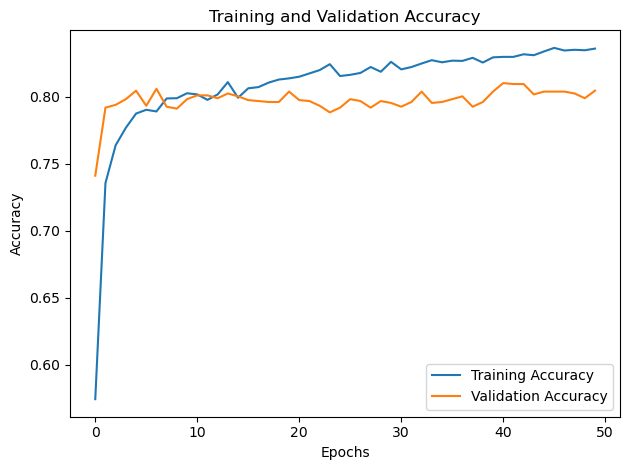

In [10]:
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show();

The graph shows the training accuracy and validation accuracy of a neural network model over the course of 100 epochs. The blue line represents the training accuracy, which starts off low but gradually increases as the model is trained. The orange line represents the validation accuracy, which also increases over time but is generally lower than the training accuracy.

This pattern of the training accuracy being higher than the validation accuracy is typical and can indicate that the model is overfitting to the training data. Overfitting occurs when a model performs well on the training data but fails to generalize well to new, unseen data.

To address this, you may want to consider techniques like regularization, early stopping, or increasing the model's complexity to improve its ability to generalize. Monitoring the gap between training and validation accuracy can help you identify when the model is starting to overfit and adjust your training approach accordingly.

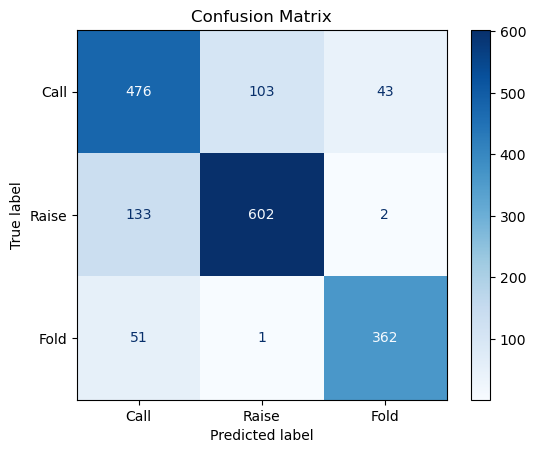

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Call', 'Raise', 'Fold'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## 📝 How Neural Network Perform?

1. **Overall Accuracy:** The overall accuracy of the Neural Network is **81%**.

2. **Performance Metrics for Each Class**:
- **Class 0 (Call)**: Precision 0.75, Recall 0.72, F1-score 0.73 – decent performance but could be improved.
- **Class 1 (Raise)**: Precision 0.84, Recall 0.87, F1-score 0.85 – strong performance, well balanced.
- **Class 2 (Fold)**: Precision 0.86, Recall 0.86, F1-score 0.86 – very strong performance, well balanced.

3. **Comparison with Other Models**:
   - **Logistic Regression Accuracy (80%)**: The Logistic Regression model has the lowest accuracy among the three models. However, it still performs reasonably well, especially considering it's a simpler model compared to the Neural Network and Random Forest.
   - **Random Forest Accuracy (85%)**: The Random Forest model performs slightly better than the Neural Network (99% vs. 83%). However, the large gap between the train and test accuracy scores for the Random Forest model indicates overfitting.
   - **Neural Network**: The Neural Network shows good overall performance with decent precision and recall for all classes, especially for "Raise" and "Fold." Additionally, it does not exhibit signs of overfitting or underfitting.

In [15]:
import joblib

# Save the model
joblib.dump(model, '../model/poker_strategy_neural.pkl')

['../model/poker_strategy_neural.pkl']